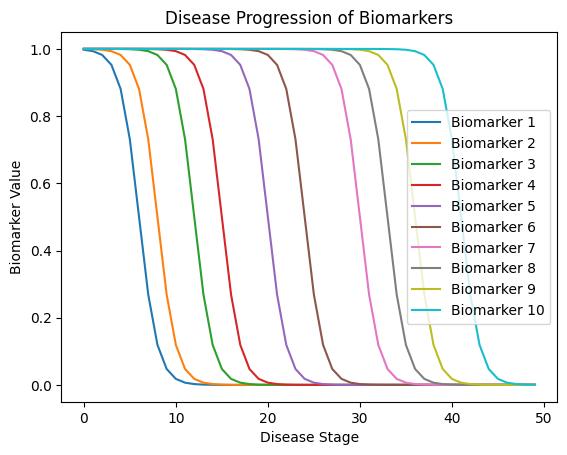

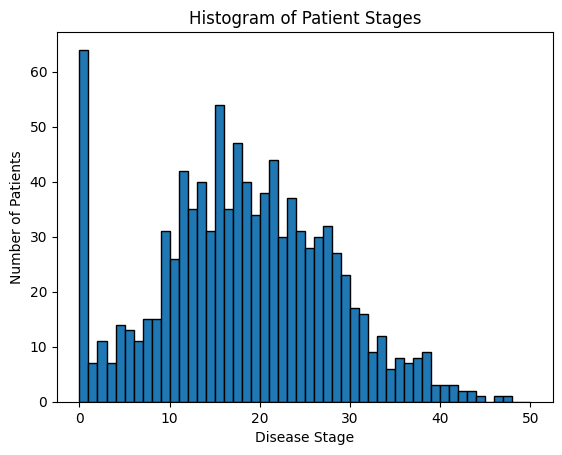

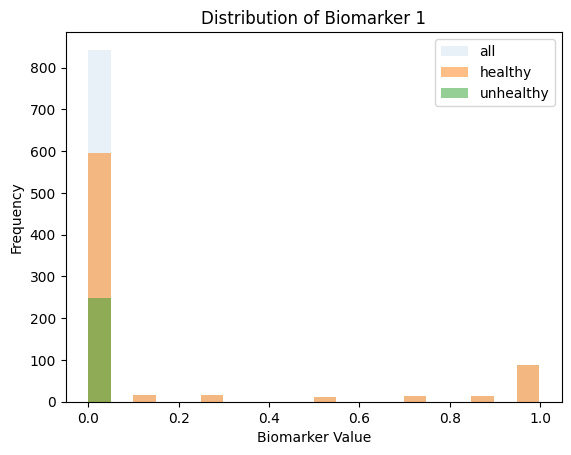

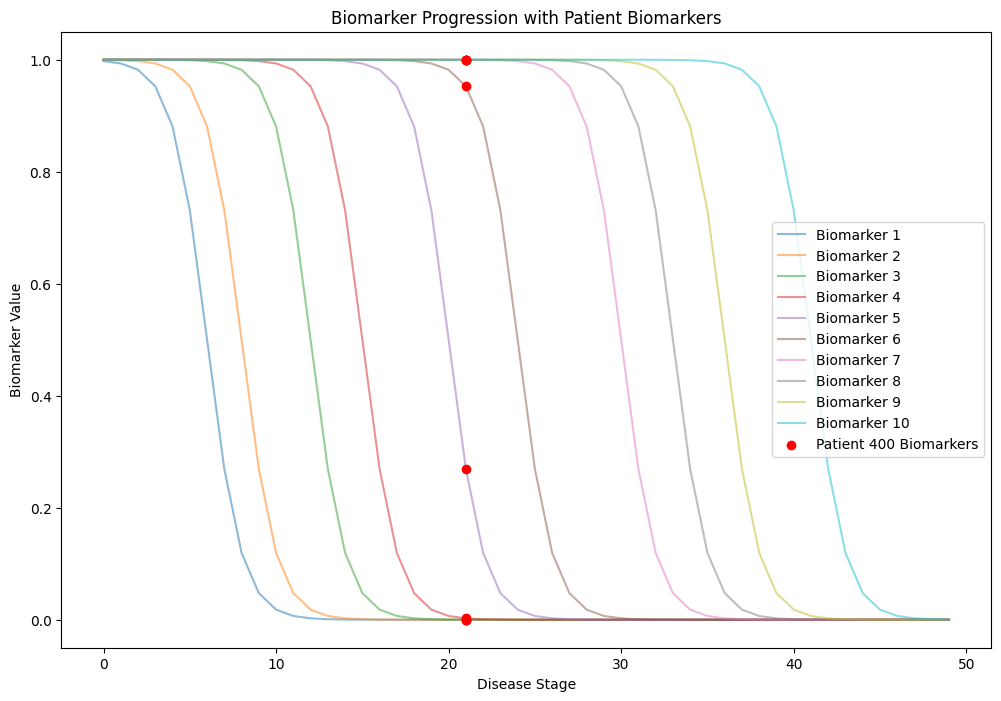

In [3]:
from canonical_generator import CanonicalGenerator
from sample_generator import SampleGenerator
from disease_progression_analyzer import DiseaseProgressionAnalyzer

# specify model parameters
n_biomarkers = 10
n_stages = 50
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 6, 'c': 1},
    1: {'s': 8, 'c': 1},
    2: {'s': 12, 'c': 1},
    3: {'s': 15, 'c': 1},
    4: {'s': 20, 'c': 1},
    5: {'s': 24, 'c': 1},
    6: {'s': 30, 'c': 1},
    7: {'s': 33, 'c': 1},
    8: {'s': 36, 'c': 1},
    9: {'s': 41, 'c': 1},
    10: {'s': 45, 'c': 1}
}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=False, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()

# plot biomarker distribution
sample_generator.plot_biomarker_distribution(biomarker_index=0, threshold=0.5)

# plot a patient's biomarkers
sample_generator.plot_patient_biomarkers(patient_index=400)

# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.run_analysis('mcmc')
# orders = analyzer._run_mcmc_analysis()  # this should be implemented in the _run_mcmc_analysis method
# analyzer.print_orders(orders)
